In [10]:
import json
from tqdm import tqdm

import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
train = json.load(open('data/WebQA.v1.0/me_train.json', 'r'))
train

In [ ]:
val = json.load(open('data/WebQA.v1.0/me_validation.ir.json', 'r'))
val

In [7]:
def get_df(ds):
    rows = []
    for kq, vq in tqdm(ds.items()):
        question = vq['question']
        
        for ke, ve in vq['evidences'].items():
            qas = []
            answers = ve['answer']
            if answers[0] == 'no_answer':
                rows.append({
                    'context': ve['evidence'],
                    'question': question, 
                    'answer': np.nan,
                    'answer_start': np.nan
                })
            else:
                for ans in answers:
                    for f in find_all(ve['evidence'], ans):
                        rows.append({
                            'context': ve['evidence'],
                            'question': question, 
                            'answer': ans,
                            'answer_start': f
                        })
            
    return pd.DataFrame(rows)

In [8]:
df_train = get_df(train)
df_train

100%|██████████| 36181/36181 [00:01<00:00, 29674.83it/s]


,answer,answer_start,context,question
0,NaN,NaN,"1、十月革命胜利,世界上出现了第一个社会主义国家.一个崭新的社会主义报刊体系在苏俄确立形成....",世界上最早的报纸诞生于
1,NaN,NaN,"1566年,世界最早的印刷报纸《威尼斯新闻》诞生于1566年的意大利威尼斯",世界上最早的报纸诞生于
2,NaN,NaN,世界上最早的报纸诞生在1609年。,世界上最早的报纸诞生于
3,中国,26.0,"北宋末年(公元11,12世纪)出现的印刷报纸,不仅是中国新闻史上最早的印刷报纸,也是世界新闻...",世界上最早的报纸诞生于
4,中国,56.0,"北宋末年(公元11,12世纪)出现的印刷报纸,不仅是中国新闻史上最早的印刷报纸,也是世界新闻...",世界上最早的报纸诞生于
5,中国,91.0,"北宋末年(公元11,12世纪)出现的印刷报纸,不仅是中国新闻史上最早的印刷报纸,也是世界新闻...",世界上最早的报纸诞生于
6,中国,101.0,"北宋末年(公元11,12世纪)出现的印刷报纸,不仅是中国新闻史上最早的印刷报纸,也是世界新闻...",世界上最早的报纸诞生于
7,中国,157.0,"北宋末年(公元11,12世纪)出现的印刷报纸,不仅是中国新闻史上最早的印刷报纸,也是世界新闻...",世界上最早的报纸诞生于
8,中国,306.0,"北宋末年(公元11,12世纪)出现的印刷报纸,不仅是中国新闻史上最早的印刷报纸,也是世界新闻...",世界上最早的报纸诞生于
9,中国,358.0,"北宋末年(公元11,12世纪)出现的印刷报纸,不仅是中国新闻史上最早的印刷报纸,也是世界新闻...",世界上最早的报纸诞生于


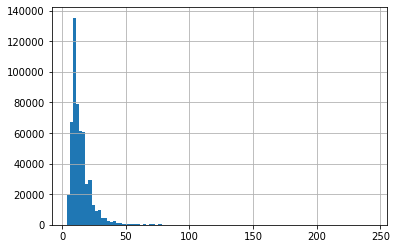

In [12]:
df_train['question'].str.len().hist(bins=100)

In [16]:
df_train['question'].str.len().quantile(0.99)

47.0

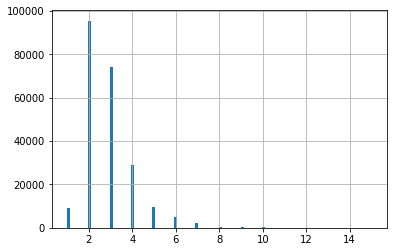

In [13]:
df_train.dropna()['answer'].str.len().hist(bins=100)

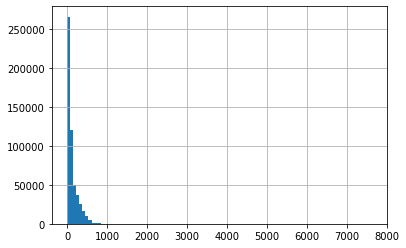

In [14]:
df_train['context'].str.len().hist(bins=100)

In [17]:
df_train['context'].str.len().quantile(0.999)

1478.0

In [4]:
def find_all(a, b):
    locs = []
    p = 0
    
    while True:
        q = a[p:].find(b)
        if q == -1:
            break
        else:
            locs.append(p + q)
            p = p + q + len(b)
    
    return locs

In [34]:
def get_data(ds):
    data = {
        "version": "v2.0",
        "data": [

        ]
    }
    
    for kq, vq in tqdm(ds.items()):
        question = vq['question']
        
        for ke, ve in vq['evidences'].items():
            qas = []
            answers = ve['answer']
            if answers[0] == 'no_answer':
                qas.append({
                    'question': question,
                    'id': ke,
                    'answers': [
                    ],
                    'is_impossible': True,
                })
            else:
                finds = []
                for ans in answers:
                    finds.extend(find_all(ve['evidence'][:1000], ans))
                if len(finds) > 0:
                    qas.append({
                        'question': question,
                        'id': ke,
                        'answers': [
                            {
                                'text': ans,
                                'answer_start': f
                            } for f in finds
                        ],
                        'is_impossible': False,
                    })
                else:
                    print(answers, ve['evidence'])
            
            d = {
                'title': ke,
                'paragraphs': [{
                    'context': ve['evidence'][:1000],
                    'qas': qas
                }]
            }
            data['data'].append(d)
    return data

In [ ]:
train_data = get_data(train)

In [ ]:
val_data = get_data(val)
val_data

In [37]:
json.dump(train_data, open('data/webqa_squad_train.json', 'w'), ensure_ascii=False)
json.dump(val_data, open('data/webqa_squad_eval.json', 'w'), ensure_ascii=False)